## EIGENVECTORS AND EIGENVALUES FROM A MATRIX

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from plotnine import *
import scipy.linalg as la
from sympy.interactive.printing import init_printing
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [3]:
# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style(theme='oceans16')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
#jtplot.style(context='notebook', fscale=1.2, spines=False, ticks=True, gridlines='-')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
# jtplot.style(ticks=True, grid=True)

# reset default matplotlib rcParams


In [4]:
init_printing(use_unicode=True, wrap_line=True)

Let **A** be a square matrix.
S non-zero vector **v** is an eigenvector for A with eigenvalue $\lambda$ if:
$$Av = \lambda v$$
Rearranging the equations, we see that **v** is a solution of the homogenous system of equations:
$$(A - \lambda I)v = 0$$
where I is the identity matrix of size n.

Non-trivial solutions exist only if the matrix $A- \lambda I$ is singular => $det(A - \lambda I) = 0$.

<font color=red>Eigenvalues of A are roots of the CHARACTERISTIC POLYNOMIAL</font>:
$$p(\lambda) = det(A - \lambda I)$$

***
Scipy package helps in computing the eigenvalues and eigenvectors of a square matrix A.

**scipy.linalg.eig** - computes eigenvalues and eigenvectors of a square matrix A
***

<font color=red>**!!! In numpy linalg and scipy the eigenvectors are normalized so their Euclidean norms are 1** </font>

### How it works step by step

In [5]:
# crate an array (vectors are in the columns, so x coord go first, y in the second)
M = np.array([[3,4], [0,5]])
M

array([[3, 4],
       [0, 5]])

In [6]:
# USING SCIPY the formula results a tuple in the form (eigvals, eigvecs)
results = la.eig(M)
results

(array([3.+0.j, 5.+0.j]), array([[1.        , 0.89442719],
        [0.        , 0.4472136 ]]))

In [7]:
# print the eigenvalues of A (these are real numbers so we can print them accordingly)
results[0].real

array([3., 5.])

In [8]:
# print the corresponding eigenvectors
results[1]

array([[1.        , 0.89442719],
       [0.        , 0.4472136 ]])

In [9]:
# unpacking the tuple
eigvals, eigvecs = LA.eig(M)

print("The eigenvalues are: ", eigvals.real)
print("The eigenvectors are: \n", eigvecs)

The eigenvalues are:  [3. 5.]
The eigenvectors are: 
 [[1.         0.89442719]
 [0.         0.4472136 ]]


**Check the eigenvector/eigenvalue condition $Au = \lambda u$ where $u$ is the eigenvector and $\lambda$ is its eigenvalue**  
- from the previous results, we have lambda1 = 3 and lambda2 = 5
- we can index them to extract each individually
- **we multiply the eigenvector by M (original matrix) and check that it is the same as multiplying the same eigenvector by its eigenvalue**

$u$ - one of the eigenvectors resulting from the calculations  
$\lambda$ -corresponding eigenvalue for the previous vector  
$M$ - matrix given as input for the calculations

In [10]:
# take the second eigenvector
u = eigvecs[:, 1]
u

array([0.89442719, 0.4472136 ])

In [11]:
# take the second lambda
lambdaM = eigvals[1].real
lambdaM

In [12]:
# multiply the input matrix with the eigenvector selected
np.dot(M, u)

array([4.47213595, 2.23606798])

We see that the result of multiplying the input matrix with the eigenvector and the eigenvalue with the eigenvector are the same. So $Au = \lambda u$.

In [13]:
# multiply same eigenvector by its corresponding eigenvalue
lambdaM*u

array([4.47213595, 2.23606798])

### Function to calculate the eigenvalues and vectors and display them nicely

In [14]:
# helper function
def isSquareMatrix(matrix):
    """
    checks is a matrix is square (length of all rows must equal the number of rows)
    """
    return matrix.shape[0] == matrix.shape[1]

In [15]:
# helper function
def characteristic_polynomial(matrix):
    """
    display the characteristic polynomial of a matrix
    """
    
    m = Matrix(matrix)
    
    return m.charpoly()

In [16]:
def solve_sympy(matrix):
    """
    matrix: a numpy array in a square shape
    """
    
    # for sympy calculations, transform the array into a Matrix object
    m = Matrix(matrix)
    print(m)
    
    # check that the matrix is square
    if isSquareMatrix(matrix):
        
        # calculate the eigenvalues and eigenvectors using sympy
        sympy_eigvals = m.eigenvals()
        sympy_eigvect = m.eigenvects()
        
        # calculate the characteristic polynomical
        char_poly = m.charpoly()
        
    # error for matrix input
    else:
        print("Your input matrix is not square or is empty.")
        
    print("Eigenvalues:")
    for i in sympy_eigvals.items():
        print(i[0])
        
    for i in sympy_eigvect:
        print("Eigenvalue: ", i[0], "\nCorresponding eigenvector: ", i[2])
    print("Characteristic polynomial: ", char_poly)
    
    # loop through the results and return the eigenvectors to plot
    l = []
    for i in range(len(sympy_eigvect)):
        l.append(sympy_eigvect[i][2][0])
        
    to_plot = np.array(l).astype(np.float64).T
        
    #if len(sympy_eigvect) ==2:
    #    p = sympy_eigvect[0][2][0], sympy_eigvect[1][2][0]
    #    to_plot = np.array(p).astype(np.float64).T
    #else:
    #    p = sympy_eigvect[0][2][0]
    #    to_plot = np.array(p).astype(np.float64).T
    
    return sympy_eigvect, char_poly, to_plot

In [17]:
def solve_scipy(matrix):
    """
    matrix: a numpy array in a square shape
    """
    
    # check that the matrix is square
    if isSquareMatrix(matrix):
        
        # calculate the eigenvalues and eigenvectors - using scipy
        eigvals, eigvecs = la.eig(matrix)
        
    # error for matrix input
    else:
        print("Your input matrix is not square or is empty.")
        
    print("The eigenvalues are: ", eigvals.real, "\nThe eigenvectors are: \n", eigvecs)
    return eigvals, eigvecs

In [18]:
def plot_vectors(original, eigen):
    """
    Create an overaly of the vectors in 2D space.
    original -> given matrix
    eigen -> calculated eigen vectors
    """
    
    # set the values in this order: 1st row for x, 2nd row for y
    #for origin
    X = np.array((0)) 
    Y = np.array((0))
    
    # for axes
    U = original[0,:]
    V = original[1,:]
    U1 = eigen[0,:]
    V1 = eigen[1,:]
    
    # check the limits for x and y axes and add 1
    # this can be condensed into a one liner if you want to make it square - here only for display purposes
    xlimit = max(np.amax(abs(U))+1, np.amax(abs(U1))+1)
    ylimit = max(np.amax(abs(V))+1, np.amax(abs(V1))+1)
    
    # choose the bigger number between x and y limits to have a square graph
    lim = xlimit if xlimit > ylimit else ylimit
     
    # set figure size
    fig, ax = plt.subplots(figsize=(20,10))#(1, 2, sharex=True, sharey=True, figsize=(20, 10))
    
    # IMPORTANT FOR ASPECT RATIO
    ax.set_aspect('equal')
    
    #ax[0]
    # plot the vectors
    plt.quiver(X, Y, U, V, 
                   color =["r", "black"],
                   units='xy', scale=1, width = 0.03, alpha=0.7)
    #ax[1]
    plt.quiver(X, Y, U1, V1, 
                   color =["green", "orange"],
                   units='xy', scale=1, headlength=5.5, width=0.05, alpha=0.7)
    
    # set the x,y limits automatically and limit them at 1 interval ticks
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.xticks(np.arange(-lim, lim, step=1)) 
    plt.yticks(np.arange(-lim, lim, step=1))
    #ax[0]
    
    # annotate the vectors
    plt.annotate("v1", xy = (original[0,:][0], original[1,:][0]),
                 color = "red", weight = "semibold", size = 12)
  #ax[0]
    plt.annotate("v2", xy = (original[0,:][1], original[1,:][1]), 
                 color = "black", weight = "semibold", size =12)
  #ax[1]
    if len(eigen[0])>1:
        plt.annotate("eigen_v1", xy = ((eigen[0,:][0]), (eigen[1,:][0])-0.5),
                     color = "green", weight = "bold", size = 13)
      #ax[1]
        plt.annotate("eigen_v2", xy = (eigen[0,:][1], eigen[1,:][1]), 
                     color = "orange", weight = "bold", size =13)
    else:
        plt.annotate("eigen_v1", xy = ((eigen[0,:][0]), (eigen[1,:][0])-0.5),
                     color = "green", weight = "bold", size = 13)
    plt.show()

## COURSERA QUIZ

1. **For the matrix A = [[1,0],[0,2]], what is the caracteristic polynomical and the solutions to it?**

Matrix([[1, 0], [0, 2]])
Eigenvalues:
1
2
Eigenvalue:  1 
Corresponding eigenvector:  [Matrix([
[1],
[0]])]
Eigenvalue:  2 
Corresponding eigenvector:  [Matrix([
[0],
[1]])]
Characteristic polynomial:  PurePoly(lambda**2 - 3*lambda + 2, lambda, domain='ZZ')


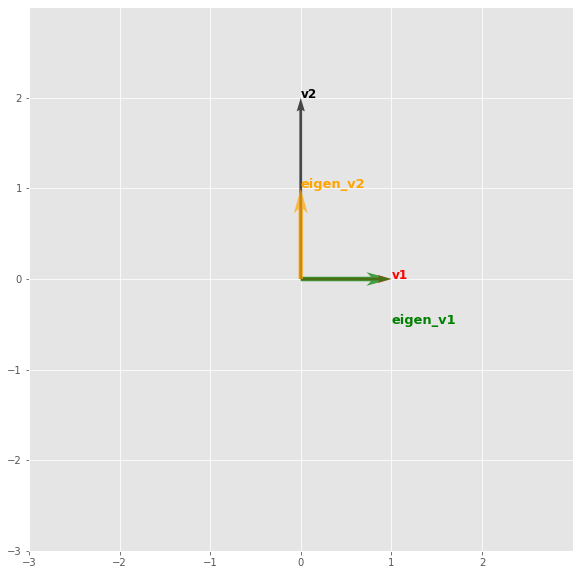

In [19]:
A = Matrix(2,2, (1, 0, 0, 2))
A1 = np.array([[1,0], [0, 2]])

eveca, epa, to_plota = solve_sympy(A1)

plot_vectors(A1, to_plota)

### 3. For the matrix A = [[3,4], [0,5]], what is the characteristic polynomial and the solutions to it?

Matrix([[3, 4], [0, 5]])
Eigenvalues:
3
5
Eigenvalue:  3 
Corresponding eigenvector:  [Matrix([
[1],
[0]])]
Eigenvalue:  5 
Corresponding eigenvector:  [Matrix([
[2],
[1]])]
Characteristic polynomial:  PurePoly(lambda**2 - 8*lambda + 15, lambda, domain='ZZ')


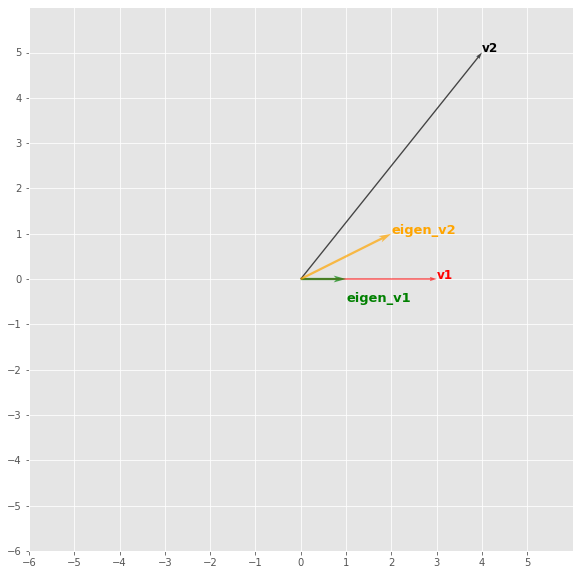

In [20]:
B1 = np.array([[3,4], [0,5]])

evecb1, epb1, to_plotb1 = solve_sympy(B1)

plot_vectors(B1, to_plotb1)

### For matrix A = [[1,0], [-1,4]] what is the charatceristic polynomial and the solutions?

Matrix([[1, 0], [-1, 4]])
Eigenvalues:
1
4
Eigenvalue:  1 
Corresponding eigenvector:  [Matrix([
[3],
[1]])]
Eigenvalue:  4 
Corresponding eigenvector:  [Matrix([
[0],
[1]])]
Characteristic polynomial:  PurePoly(lambda**2 - 5*lambda + 4, lambda, domain='ZZ')


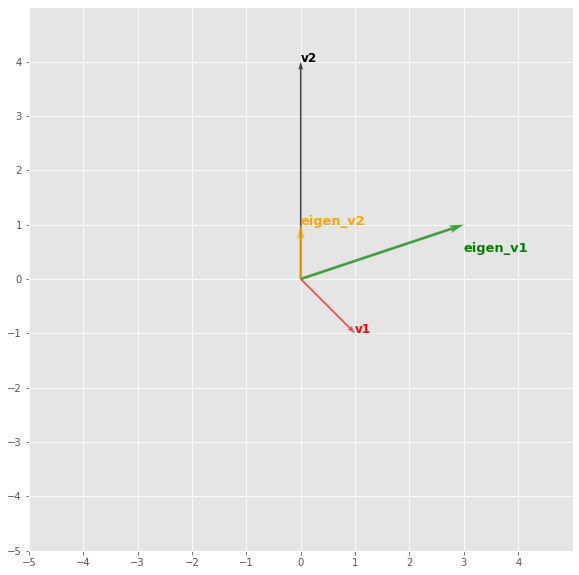

In [21]:
C1 = np.array([[1,0], [-1,4]])

evec_c1, ep_c1, to_plot_c1 = solve_sympy(C1)

plot_vectors(C1, to_plot_c1)

In [22]:
to_plot_c1

array([[3., 0.],
       [1., 1.]])

### For matrix A = [[-3, 8], [2, 3]] what is the characteristic polynomical and the solutions?

Matrix([[-3, 8], [2, 3]])
Eigenvalues:
-5
5
Eigenvalue:  -5 
Corresponding eigenvector:  [Matrix([
[-4],
[ 1]])]
Eigenvalue:  5 
Corresponding eigenvector:  [Matrix([
[1],
[1]])]
Characteristic polynomial:  PurePoly(lambda**2 - 25, lambda, domain='ZZ')


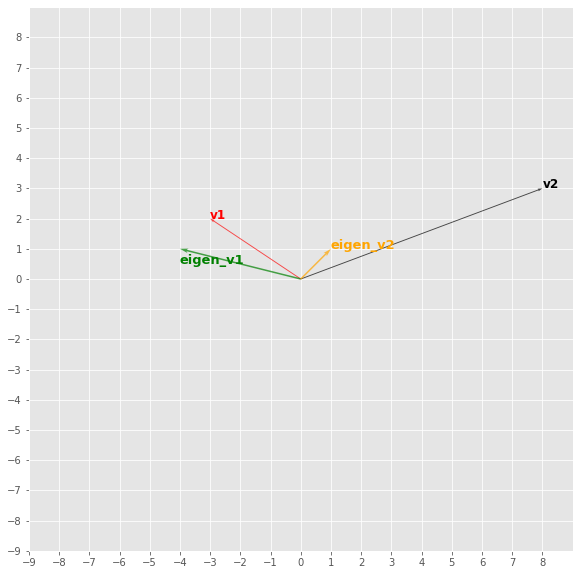

In [23]:
D1 = np.array([[-3, 8], [2, 3]])

evec_d1, ep_d1, to_plot_d1 = solve_sympy(D1)

plot_vectors(D1, to_plot_d1)

### For the matrix A = [[1,0], [-1,4]] what is the characteristic polynomial and the solutions?

Matrix([[1, 0], [-1, 4]])
Eigenvalues:
1
4
Eigenvalue:  1 
Corresponding eigenvector:  [Matrix([
[3],
[1]])]
Eigenvalue:  4 
Corresponding eigenvector:  [Matrix([
[0],
[1]])]
Characteristic polynomial:  PurePoly(lambda**2 - 5*lambda + 4, lambda, domain='ZZ')


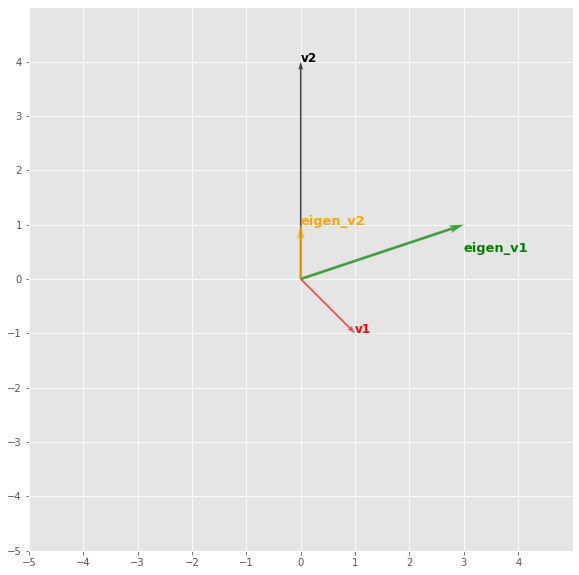

In [24]:
E1 = np.array([[ 1, 0], [-1, 4]])

evec_E1, ep_E1, to_plot_e1 = solve_sympy(E1)

plot_vectors(E1, to_plot_e1)

Matrix([[5, 4], [-4, -3]])
Eigenvalues:
1
Eigenvalue:  1 
Corresponding eigenvector:  [Matrix([
[-1],
[ 1]])]
Characteristic polynomial:  PurePoly(lambda**2 - 2*lambda + 1, lambda, domain='ZZ')


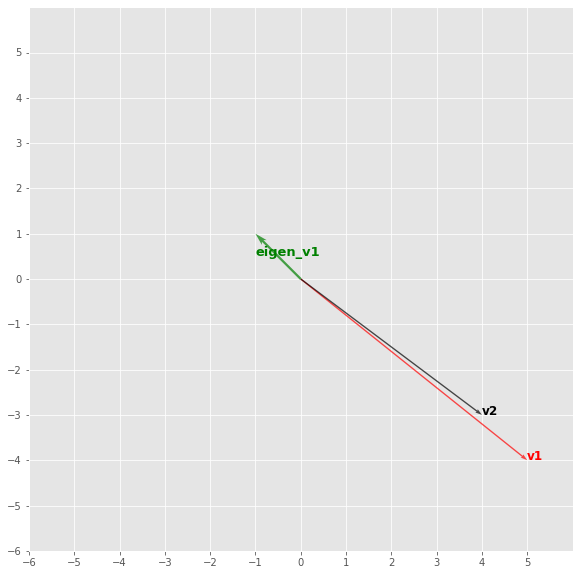

In [25]:
F = np.array([[5, 4], [ -4, -3]])
evec_F, ep_F, to_plot_f = solve_sympy(F)

plot_vectors(F, to_plot_f)

In [26]:
G = np.array([[-2, -3], [1,1]])
evec_G, ep_G, to_plot_g = solve_sympy(G)

Matrix([[-2, -3], [1, 1]])
Eigenvalues:
-1/2 - sqrt(3)*I/2
-1/2 + sqrt(3)*I/2
Eigenvalue:  -1/2 - sqrt(3)*I/2 
Corresponding eigenvector:  [Matrix([
[3/(-3/2 + sqrt(3)*I/2)],
[                     1]])]
Eigenvalue:  -1/2 + sqrt(3)*I/2 
Corresponding eigenvector:  [Matrix([
[3/(-3/2 - sqrt(3)*I/2)],
[                     1]])]
Characteristic polynomial:  PurePoly(lambda**2 + lambda + 1, lambda, domain='ZZ')


TypeError: can't convert complex to float